In [5]:
!pwd

/mnt/c/Users/a1382/OneDrive/Desktop/mouse_brain_challenge/code


# Training from scratch

In [1]:
from experiment import *
from sklearn.model_selection import ParameterGrid # For exploring different parameter setup
import time

In [2]:
config_data= {'experiment_name':['train_scratch'],# expriment name, a folder with the same name created in experiment_data
              'model_type':['pretrained'], # type of model we are constructing, for now 'pretrained' is the only option
              'data_path':['../data/'],  # folder path that contains 3 folders named coronal, horizontal, sagittal respectively
              'val_test_ratio':[0.3],  # The ratio of validation and testing dataset, equal split between them
              'batch_size':[32], # Batch gradient descent size
              'num_workers':[8], # Numnber of workers for the dataloader
              'seed':[2],  # seed number for train, test, val split
              'device':['cuda'], # device to put the model and data on
              'eval_flag':[False], # False for training from scratch
              'num_epochs':[20], # Number of training epochs
              'patience':[5],  # Number of epochs to wait if the validation error do not decrease
              'lr':[0.001],  # learning rate
              'l2_p': [0.0005],  # l2 penalization for the weights
              'decay_rate':[0.9]} # Exponential decay rate for the learning rate

In [3]:
# exploring different parameters
config_data_l = ParameterGrid(config_data) 
for config in config_data_l:
    exp = Experiment(config)
    print('Training, validation and testing sample size')
    print(exp.train_val_test_num_dict)
    start = time.time()
    exp.run()
    test_acc,pred_labels, true_labels, cross_entropy_l, file_paths_l  = exp.test()
    end = time.time()
    time_elapse = end - start
    # Only uncomment this if you are exploring the hyper-parameter space
    #exp = None
    #gc.collect()
    #torch.cuda.empty_cache()

Training, validation and testing sample size
{'Horizontal train': 238, 'Coronal train': 226, 'Sagittal train': 262, 'Horizontal val': 51, 'Coronal val': 48, 'Sagittal val': 56, 'Horizontal testing': 51, 'Coronal testing': 48, 'Sagittal testing': 56}


Test accuracy is 0.99375


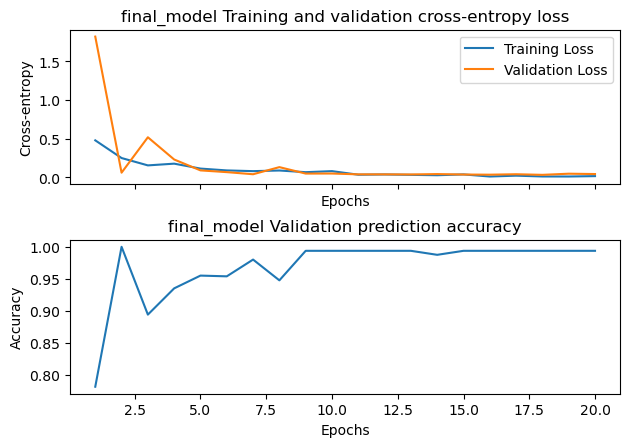

In [4]:
print(f'Test accuracy is {test_acc}')
exp.plot_stats()

## Confusion Matrix for test data set

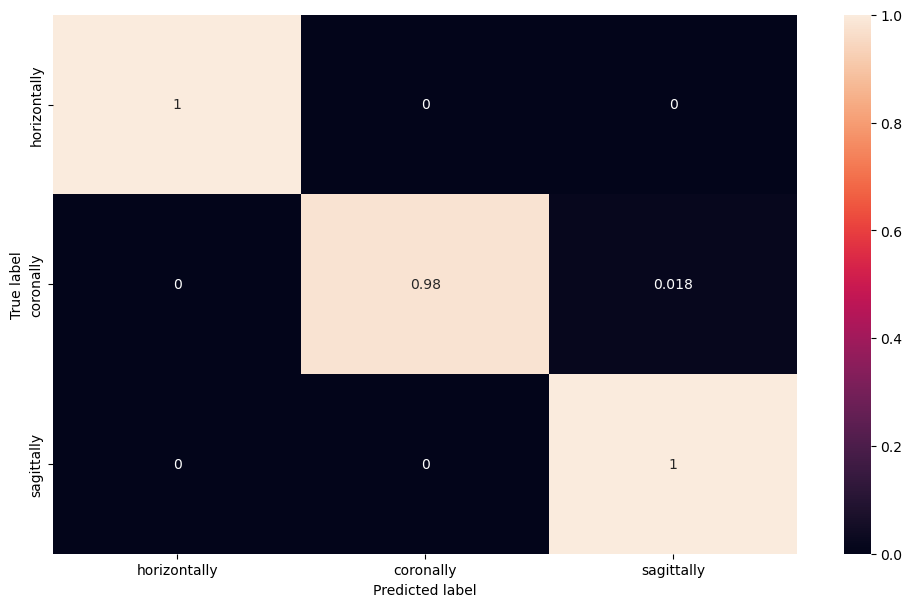

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

classes = ('horizontally', 'coronally', 'sagittally')

# Build confusion matrix
cf_matrix = confusion_matrix(true_labels, pred_labels)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
heat_map = sn.heatmap(df_cm, annot=True)
heat_map.set(xlabel='Predicted label', ylabel='True label')
plt.savefig('../experiment_data/'+config_data['experiment_name'][0]+'/output.png')


## GradCam

Here we plot three instances of three classes:
* Max cross-entropy example
* Min cross-entropy example
* Random image example

<Figure size 640x480 with 0 Axes>

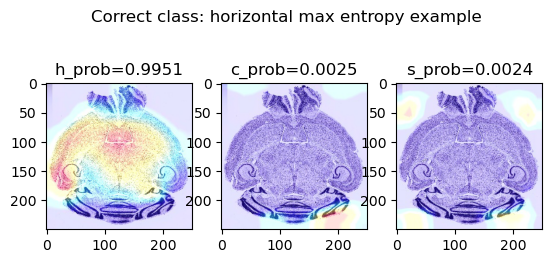

<Figure size 640x480 with 0 Axes>

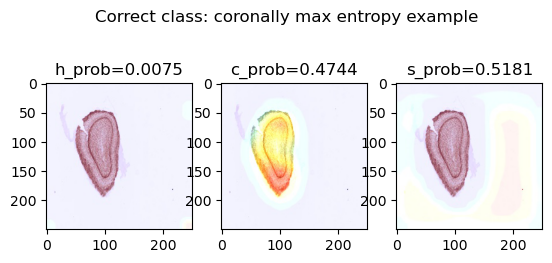

<Figure size 640x480 with 0 Axes>

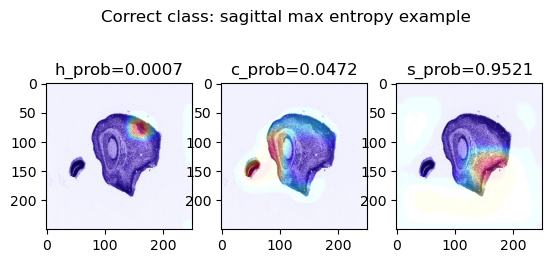

<Figure size 640x480 with 0 Axes>

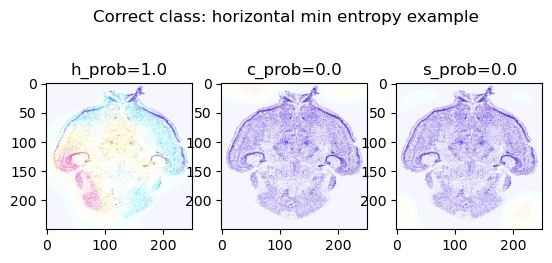

<Figure size 640x480 with 0 Axes>

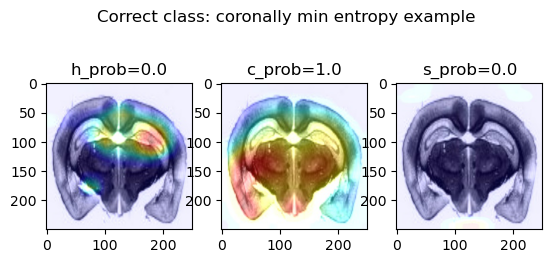

<Figure size 640x480 with 0 Axes>

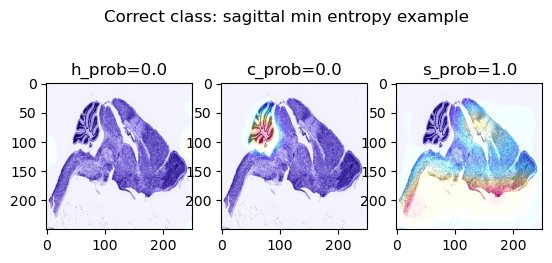

<Figure size 640x480 with 0 Axes>

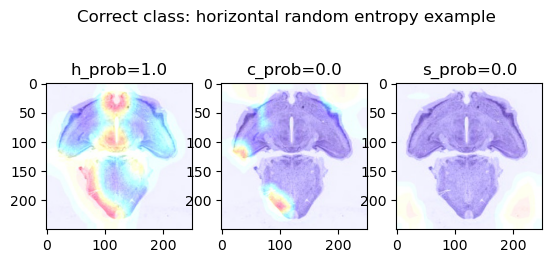

<Figure size 640x480 with 0 Axes>

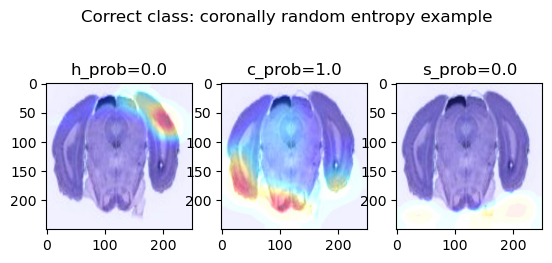

<Figure size 640x480 with 0 Axes>

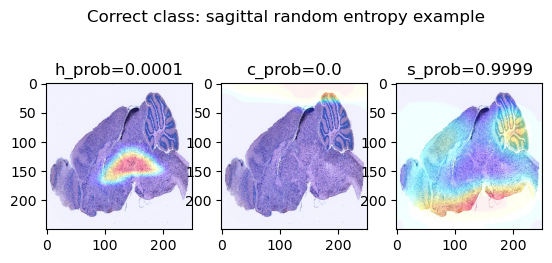

In [6]:
import gradcam_plot
gradcam_plot.show_gradcam(exp,true_labels, cross_entropy_l, file_paths_l)

# Evaluation using saved model

Below shows an example of what kind of data it takes in

In [10]:
# from PIL import Image
# import numpy as np
# import os
# file_names_c = os.listdir('../data/coronal')
# file_names_h = os.listdir('../data/horizontal')
# file_names_s = os.listdir('../data/sagittal')
# images = []
# for i in range(10):
#     j = np.random.randint(low = 0, high = 100)
#     images.append(np.expand_dims(np.array(Image.open(os.path.join('../data/coronal', file_names_c[j])).resize((512,512))), 0))
#     images.append(np.expand_dims(np.array(Image.open(os.path.join('../data/horizontal', file_names_h[j])).resize((512,512))), 0))
#     images.append(np.expand_dims(np.array(Image.open(os.path.join('../data/sagittal', file_names_s[j])).resize((512,512))),0))
# images = np.concatenate(images,0)

In [12]:
# print(images.shape)
# print(np.max(images))
# print(np.min(images))

(30, 512, 512, 3)
255
0


In [14]:
from experiment import *
config_data= {'experiment_name':'final_model',# expriment name, a folder with the same name created in experiment_data
              'model_type':'pretrained', # type of model we are constructing, for now 'pretrained' is the only option
              'data_path':None,  # folder path that contains 3 folders named coronal, horizontal, sagittal respectively
              'val_test_ratio':0.3,  # The ratio of validation and testing dataset, equal split between them
              'batch_size':32, # Batch gradient descent size
              'num_workers':8, # Numnber of workers for the dataloader
              'seed':2,  # seed number for train, test, val split
              'device':'cuda', # device to put the model and data on
              'eval_flag':True, # False for training from scratch
              'num_epochs':20, # Number of training epochs
              'patience':5,  # Number of epochs to wait if the validation error do not decrease
              'lr':0.001,  # learning rate
              'l2_p': 0.0005,  # l2 penalization for the weights
              'decay_rate':0.9} # Exponential decay rate for the learning rate
exp = Experiment(config_data)
# input images is a numpy array N by 512 by 512 by 3, ranges from 0 to 255, must be on the same device as the model
exp.pred_probs(images,batch_size = 10)

array([[2.54324432e-04, 9.99743178e-01, 2.49805366e-06],
       [9.99991227e-01, 8.77221860e-06, 4.87602762e-10],
       [2.28448684e-04, 1.18827085e-05, 9.99759669e-01],
       [8.20452712e-04, 9.99176880e-01, 2.66737121e-06],
       [9.99999748e-01, 2.51658461e-07, 7.21946482e-13],
       [8.17506956e-05, 1.59257875e-05, 9.99902324e-01],
       [9.38978698e-03, 9.90582451e-01, 2.77620596e-05],
       [9.99999623e-01, 3.76682267e-07, 1.85116975e-12],
       [3.71084951e-04, 1.43585111e-04, 9.99485330e-01],
       [3.27943340e-04, 9.99671282e-01, 7.74740288e-07],
       [9.99978713e-01, 2.12847158e-05, 2.60294795e-09],
       [2.65640095e-04, 1.62632899e-05, 9.99718097e-01],
       [3.50477705e-04, 9.99227673e-01, 4.21849461e-04],
       [9.99807485e-01, 1.92499316e-04, 1.57975258e-08],
       [1.41890149e-04, 4.23288695e-05, 9.99815781e-01],
       [4.89859831e-05, 9.99840819e-01, 1.10194893e-04],
       [9.99088807e-01, 9.11077280e-04, 1.15989819e-07],
       [7.12303863e-05, 2.04903